In [50]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

%matplotlib inline
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [51]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [52]:
### Data exploration
# for key, value in data_dict.items():
#     print (key, [item for item in value if item])
#     break

# for key, value in data_dict.items():
#     bonus = value["bonus"]
#     salary = value["salary"]
#     print key, salary, bonus

# for key, value in data_dict.items():
#     print key

In [53]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary', 'bonus'] # You will need to use more features

In [54]:
### Task 2: Remove outliers

# Removing the entry that is actually the total amount.
don_print = data_dict.pop("TOTAL",0)

In [55]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict


In [56]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#print data

In [57]:
### Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rescaled_features = scaler.fit_transform(features)
print rescaled_features[0:3]

[[ 0.18138409  0.521875  ]
 [ 0.          0.        ]
 [ 0.24003381  0.15      ]]


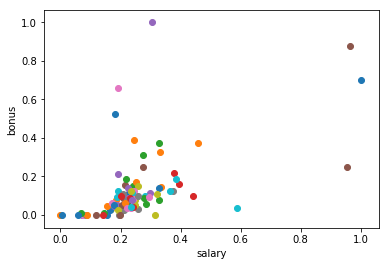

In [58]:
### Visualizing data
for point in rescaled_features:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [59]:
### Split data into training data and test data
from sklearn.model_selection import train_test_split

# random_state = 42 is the seed for randomizing the split.
features_train, features_test, labels_train, labels_test = \
    train_test_split(rescaled_features, labels, test_size=0.3, random_state=42)

In [60]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html



# Create a dictionary to store pred value of various classifiers
pred_dict = {}

# Provided to give you a starting point. Try a variety of classifiers.
# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()

In [61]:
# Classifier 1: Decision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

pred_dict['decision_tree'] = pred

In [62]:
# Classifier 2: SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C':[1,10,100,1000,10000], 'gamma':[1,10,100,1000,10000]}
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, params)
clf.fit(features_train, labels_train)
print clf.best_params_

pred = clf.predict(features_test)

pred_dict['SVM'] = pred

{'C': 1, 'gamma': 1}


In [63]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# # Example starting point. Try investigating other evaluation techniques!
# from sklearn.cross_validation import train_test_split
# features_train, features_test, labels_train, labels_test = \
#     train_test_split(features, labels, test_size=0.3, random_state=42)
    

#evaluation    
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#print labels_test
#print pred_dict

for key, value in pred_dict.items():
    print key.upper()
    acc = accuracy_score(labels_test, value)
    ps = precision_score(labels_test, value)
    rs = recall_score(labels_test, value)

    print "acc:", acc
    print "precision_score:", ps
    print "recall_score:", rs
    print "\n"

DECISION_TREE
acc: 0.655172413793
precision_score: 0.2
recall_score: 0.142857142857


SVM
acc: 0.758620689655
precision_score: 0.0
recall_score: 0.0




In [64]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)